In [11]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK


In [2]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

# add reference point
ref = torch.tensor((1.4, 1.4))

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
train_x, train_y, train_c = bayesian_exploration(VOCS, EVALUATE,
                                                 n_initial_samples=5,
                                                 mc_samples=128, initial_x=None,
                                                 use_gpu=False,
                                                 n_steps=20, verbose=True)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': None}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
No executor given. Running in serial mode.
tensor([[0.6658, 0.3880]], dtype=torch.float64)
tensor([[0.0000, 0.9968]], dtype=torch.float64)
tensor([[0., 0.]], dtype=torch.float64)
tensor([[0.8671, 1.2552]], dtype=torch.float64)
tensor([[0.4865, 1.1045]], dtype=torch.float64)
tensor([[1.0468, 0.4087]], dtype=torch.float64)
tensor([[0.9171, 0.8001]], dtype=torch.float64)
tensor([[1.0851, 0.2662]], dtype=torch.float64)
tensor([[1.0157, 0.1069]], dtype=torch.float64)
tensor([[0.2822, 1.1129]], dtype=torch.float64)
tensor([[1.1020, 0.7618]], dtype=torch.float64)
tensor([[0.6526, 0.9171]], dtype=torch.float64)
tensor

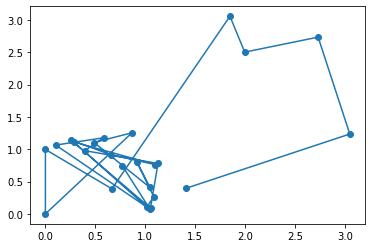

In [6]:
fig, ax = plt.subplots()
ax.plot(train_x[:, 0], train_x[:, 1], '-o')

plt.show()